# Predicting Continuous Target Variables with Regression Analysis

In [44]:
import pandas as pd

In [45]:
df = pd.read_csv("housing.data",header=None,sep='\s+')

In [46]:
'''
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''
df.columns = ['CRIM','ZN',"INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [49]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
sns.set(style='whitegrid',context="notebook")

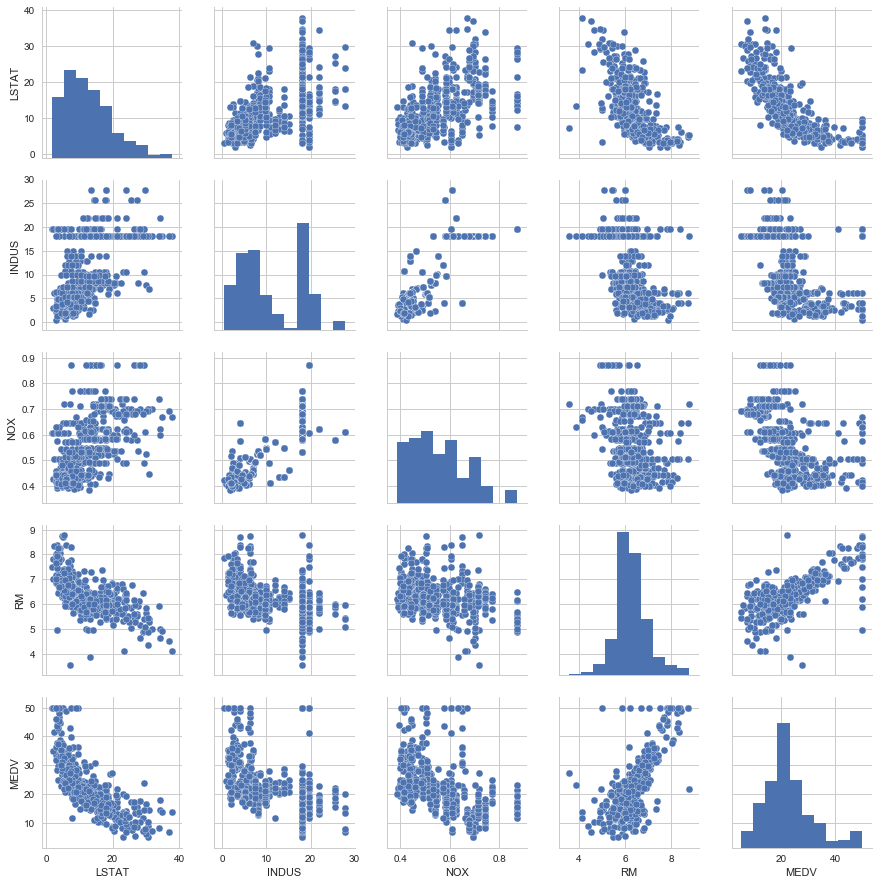

In [52]:
cols = ["LSTAT",'INDUS',"NOX","RM","MEDV"]
sns.pairplot(df[cols],size=2.5)
plt.show()

In [53]:
import numpy as np

In [54]:
cm = np.corrcoef(df[cols].values.T)

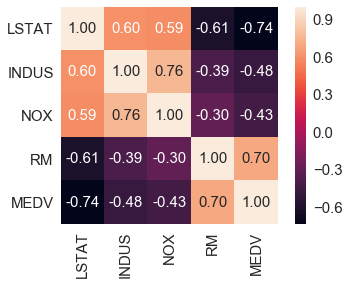

In [55]:
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

## SGD

In [56]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta*errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)


In [57]:
X = df[['RM']].values
y = df[['MEDV']].values
print(X.shape,y.shape)

(506, 1) (506, 1)


In [58]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y).flatten()

In [59]:
print(X_std.shape,y_std.shape)

(506, 1) (506,)


In [60]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

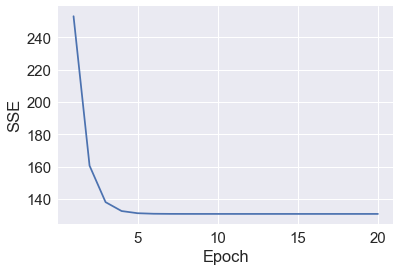

In [61]:
plt.plot(range(1,lr.n_iter+1),lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [62]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

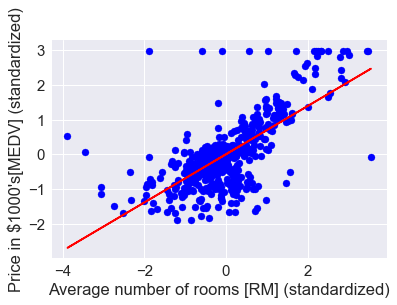

In [63]:
lin_regplot(X_std,y_std,lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s[MEDV] (standardized)')
plt.show()

In [64]:
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


In [65]:
print('Slope: %.3f'% lr.w_[1])

Slope: 0.695


In [66]:
print('Intercept: %.3f'% lr.w_[0])

Intercept: -0.000


## Estimatiing the coefficient of a regression model

In [67]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

In [68]:
slr.fit(X,y)
print('Slope: %.3f'% slr.coef_[0])
print('Intercept: %.3f'% slr.intercept_)

Slope: 9.102
Intercept: -34.671


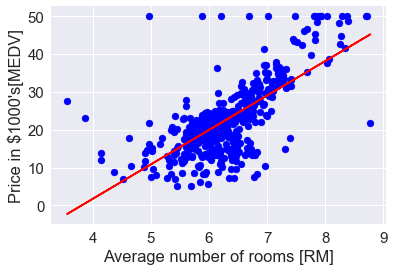

In [69]:
lin_regplot(X,y,slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s[MEDV]')
plt.show()

In [70]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=5.0,
                         random_state=0)

In [71]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [72]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:,np.newaxis])

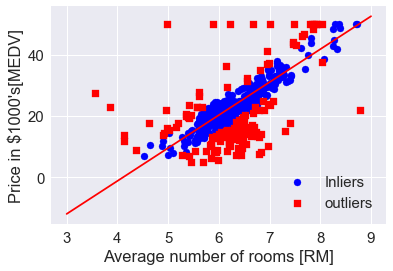

In [73]:
plt.scatter(X[inlier_mask],
            y[inlier_mask],
            c='blue',
            marker='o',
            label='Inliers')
plt.scatter(X[outlier_mask],
            y[outlier_mask],
            c='red',
            marker='s',
            label='outliers')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s[MEDV]')
plt.legend(loc="lower right")
plt.show()

In [74]:
print('Slope: %.3f'% ransac.estimator_.coef_[0])
print('Intercept: %.3f'% ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


## Performance

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.iloc[:,:-1].values
y = df[['MEDV']].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [78]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

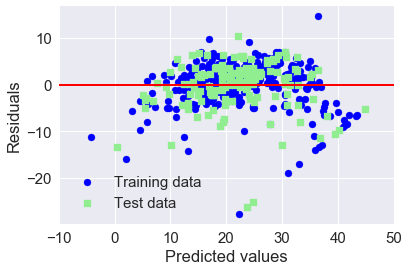

In [79]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend()
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()

In [80]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

MSE train: 19.958, test: 27.196


In [81]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

R^2 train: 0.765, test: 0.673


## Regularized methods

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [84]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0,l1_ratio=0.5)

In [85]:
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[[-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
  -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
   2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
  -4.94046539e-01]]


In [86]:
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946]


In [87]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 24.381, test: 31.874
R^2 train: 0.712, test: 0.617


## 曲线拟合

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [90]:
lr = LinearRegression()
pr = LinearRegression()

In [91]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [92]:
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [93]:
pr.fit(X_quad,y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

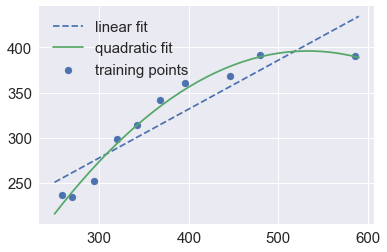

In [94]:
plt.scatter(X,y,label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit',linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend()
plt.show()


In [95]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [96]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


In [97]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [98]:
regr = LinearRegression()

In [99]:
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [100]:
# linear fit
X_fit = np.arange(X.min(),X.max(),1)[:,np.newaxis]
regr = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y,regr.predict(X))

In [101]:
# quadratic fit
regr = regr.fit(X_quad,y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y,regr.predict(X_quad))

In [102]:
# cubit fit
regr = regr.fit(X_cubic,y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y,regr.predict(X_cubic))

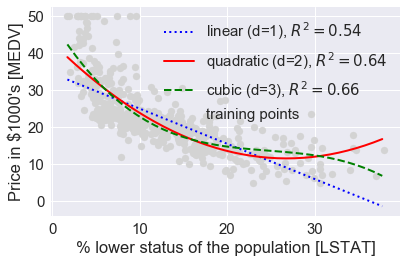

In [103]:
# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [104]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)
X_fit = np.arange(X_log.min()-1,X_log.max()+1,1)[:,np.newaxis]

In [105]:
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

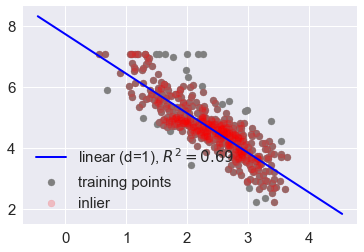

In [106]:
plt.scatter(X_log, y_sqrt,
            label='training points',
            color='gray')
plt.plot(X_fit,y_lin_fit,
         label="linear (d=1), $R^2=%.2f$" % (linear_r2),
         color='blue',
         lw=2)
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=1.0,
                         random_state=0)
ransac.fit(X_log,y_sqrt)
inlier_mask = ransac.inlier_mask_
plt.scatter(X_log[inlier_mask],y_sqrt[inlier_mask],c='red',label='inlier',marker='o',alpha=0.2)
plt.legend(loc="lower left")
plt.show()

## Decision Tree Regression

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [109]:
sort_idx = X.flatten().argsort()

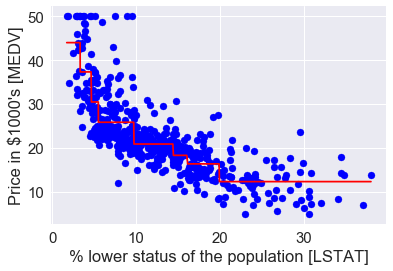

In [110]:
lin_regplot(X[sort_idx],y[sort_idx],tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

## Random Forest Regression

In [116]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6,random_state=1)

In [112]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)

In [117]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


In [118]:
print('MSE train: %.3f, test: %.3f' % (
      mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))

MSE train: 1.932, test: 13.571


In [119]:
print('R^2 train: %.3f, test: %.3f' % (
      r2_score(y_train,y_train_pred),
      r2_score(y_test,y_test_pred)))

R^2 train: 0.977, test: 0.841
